In [1]:
import pyautogui

### 데스크탑 자동화

- 마우스 제어, 키보드 제어, 스크린 캡쳐 등


In [4]:
# 모니터 해상도 가져오기

size = pyautogui.size()
print(size)
# 튜플 형식으로 출력
print(size[0])

Size(width=1920, height=1080)
1920


In [5]:
import pyautogui as p

In [13]:
# 마우스 좌표 가져오기

pos = p.position()
print(pos)
print(pos.x, pos.y)

Point(x=468, y=509)
468 509


In [18]:
# 마우스 이동
# moveTo(x좌표, y좌표, 시간) : 모니터 기준
p.moveTo(100, 100, 0.5)
p.moveTo(200, 200, 0.5)
p.moveTo(300, 300, 0.5)

In [21]:
# move() : 현재위치를 기준으로 상대좌표
p.moveTo(300, 300, 0.25)
p.move(100, 100, 0.25)
print(p.position())
p.move(100, 100, 0.25)

Point(x=400, y=400)


In [22]:
p.sleep(3)
print(p.position())

Point(x=54, y=24)


In [24]:
# 마우스 클릭
p.click(54, 24, 1)

In [26]:
p.sleep(1)
p.click(clicks=5)

In [31]:
p.click(clicks=2, interval=2, button="right")

In [33]:
p.doubleClick(487,142)

In [34]:
p.rightClick()

In [78]:
p.mouseInfo()

In [44]:
# 드래그1
p.sleep(3)
p.moveTo(25,170,0.5)
p.mouseDown()
p.moveTo(900,950,1.5)
p.mouseUp()

In [48]:
# 드래그2(상대좌표)
p.sleep(2)
p.moveTo(1136,13)
p.drag(-100,13,0.25)

In [50]:
# 스크롤 ( 양수 : 위로, 음수 : 아래로 )
p.sleep(2)
p.scroll(1000)

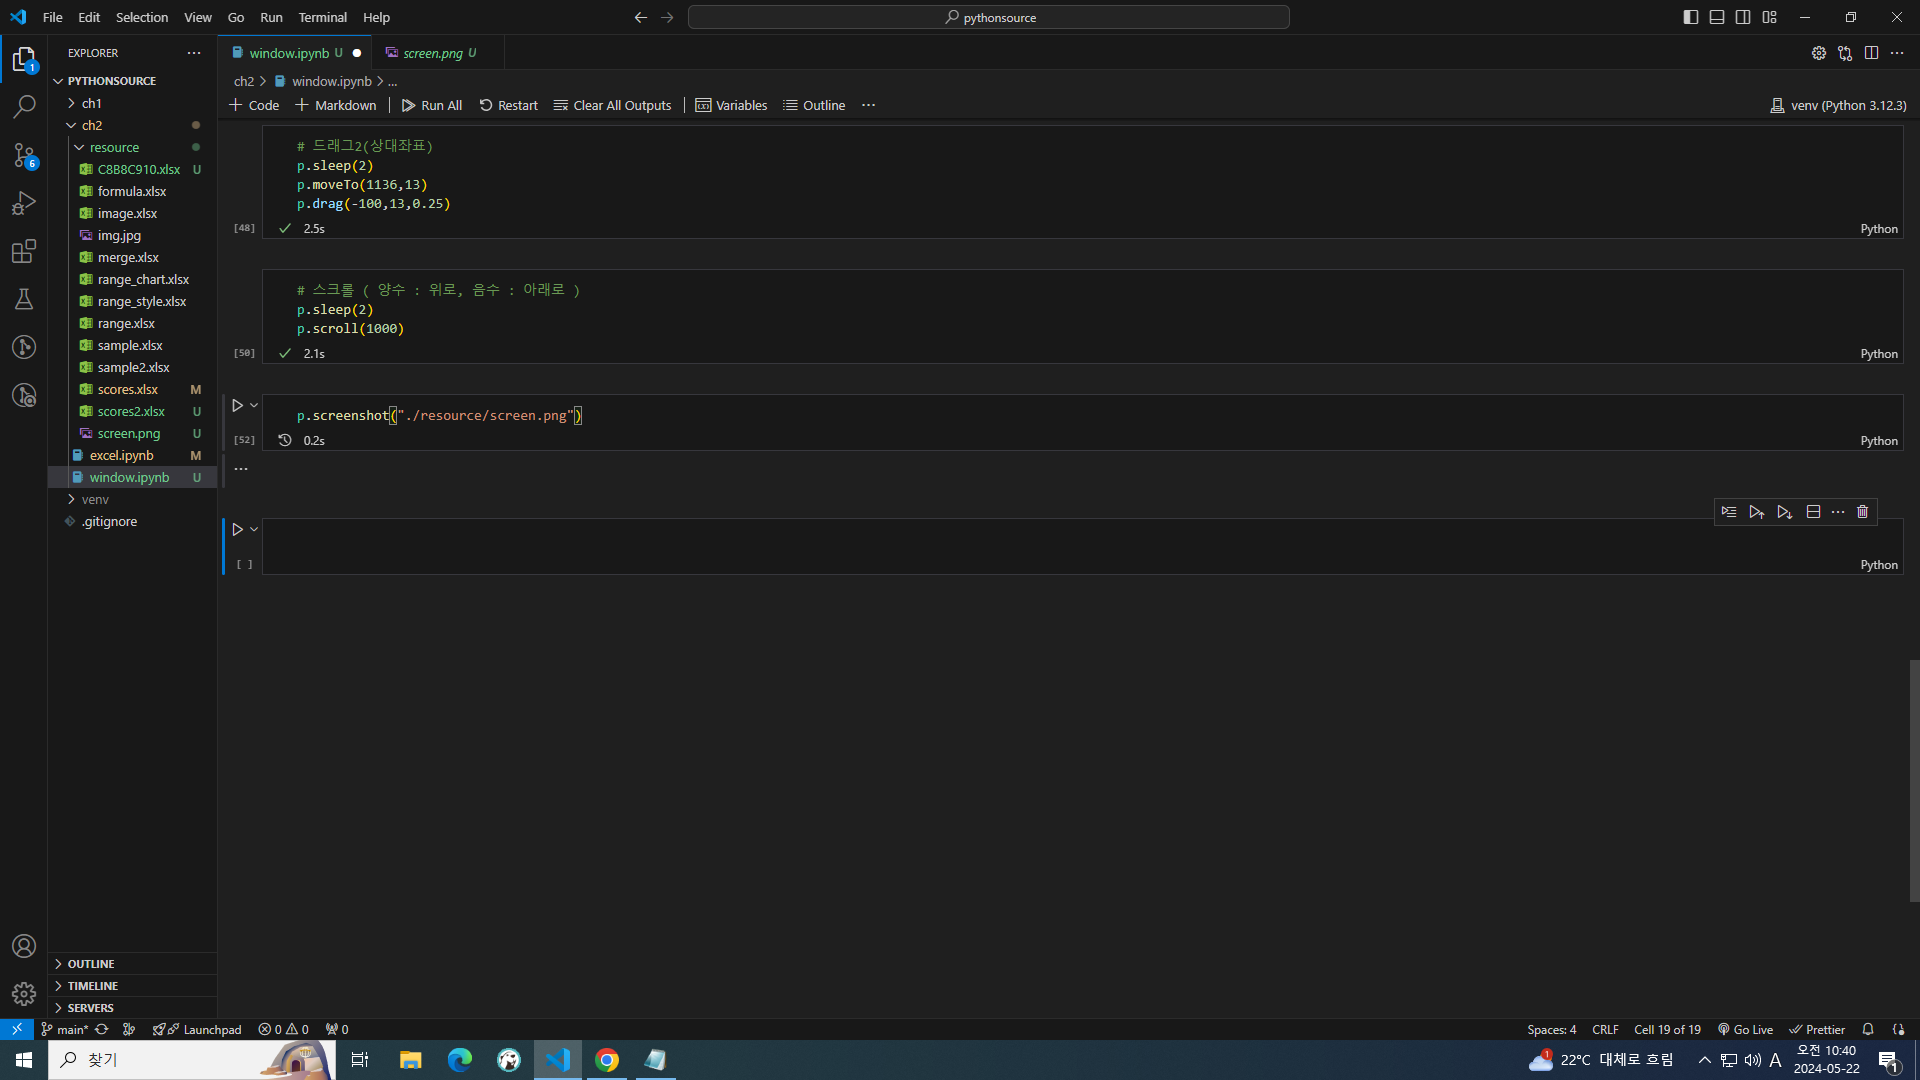

In [53]:
p.screenshot("./resource/screen.png")

In [60]:
# 범위 지정
# region=(모니터기준 기점X, 기점Y, 기점에서 상대좌표X, 상대좌표Y)
p.sleep(1)
p.screenshot("./resource/calc.png", region=(1590,34,290,508))
print()

In [61]:
# 이미지를 인식해서 모니터 위치 알려주기
# 모니터 왼쪽 상단에서 가장 가까운 이미지 위치 반환
p.locateOnScreen("./resource/calc.png")

Box(left=1456, top=255, width=290, height=508)

In [74]:
p.sleep(1)
p.screenshot("./resource/file.png", region=(38,9,65,23))
print()

In [77]:
p.locateOnScreen("./resource/file.png", confidence=0.9)

Box(left=685, top=110, width=65, height=23)

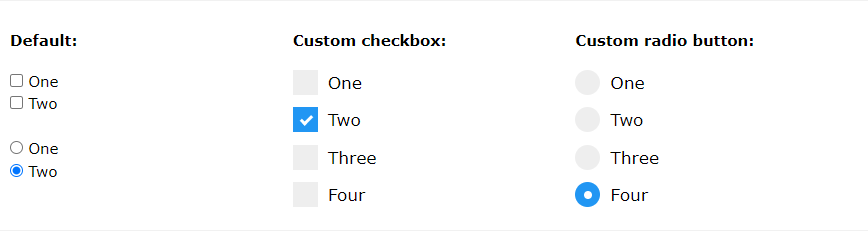

In [86]:
p.screenshot("./resource/checkbox.png", region=(997,316,868,231))

In [90]:
# 모니터 상에 표시되는 비슷한 이미지 전부 찾아옴
for i in p.locateAllOnScreen("./resource/checkbox.png", confidence=0.9):
    print(i)
    p.click(i)

Box(left=997, top=316, width=868, height=231)
Box(left=46, top=669, width=868, height=231)


In [91]:
# 현재 활성화 중인 윈도우 정보 가져오기
active = p.getActiveWindow()
print(active)

<Win32Window left="0", top="0", width="960", height="1040", title="window.ipynb - pythonsource - Visual Studio Code">


In [92]:
print(active.title)
print(active.size)
print(active.left, active.top, active.bottom, active.right)

window.ipynb - pythonsource - Visual Studio Code
Size(width=960, height=1040)
0 0 1040 960


In [158]:
# 현재 열려있는 윈도우 정보 전부 가져오기
for w in p.getAllWindows():
    print(w)

<Win32Window left="0", top="1040", width="1920", height="40", title="">
<Win32Window left="0", top="0", width="960", height="1040", title="● window.ipynb - pythonsource - Visual Studio Code">
<Win32Window left="953", top="0", width="974", height="1047", title="[python] pyautogui(2) 윈도우 자동화 - Chrome">
<Win32Window left="0", top="33", width="500", height="707", title="Cortana">
<Win32Window left="0", top="292", width="516", height="748", title="Cortana">
<Win32Window left="0", top="0", width="1920", height="1040", title="">
<Win32Window left="0", top="33", width="320", height="500", title="계산기">
<Win32Window left="1093", top="302", width="336", height="541", title="계산기">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="15", top="0", width="1905", height="4", title="">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="0", top="0", width="0", height="0", title="">
<Win32Window left="0", top="0", width="1920", height="1080

In [155]:
for w in p.getWindowsWithTitle("제목 없음"):
    print(w)

<Win32Window left="-32000", top="-32000", width="160", height="28", title="*제목 없음 - Windows 메모장">
<Win32Window left="-32000", top="-32000", width="160", height="28", title="*제목 없음 - Windows 메모장">


In [170]:
# 창 활성화, 최대화, 최소화
w = p.getWindowsWithTitle("제목 없음")[0]

if not w.isActive:
    # 창 활성화
    w.activate()

# 윈도우가 전체크기인지 확인
if not w.isMaximized:
    # 윈도우 창크기 전체 사이즈로 키우기
    w.maximize()

if not w.isMinimized:
    w.minimize()

p.sleep(1)
# 원래 크기로
w.restore()

In [167]:
# 문자 입력
import pyperclip

w = p.getWindowsWithTitle("제목 없음")[0]
if w.isMinimized:
    w.restore()

if not w.isActive:
    # 창 활성화
    w.activate()

p.write("write")
p.write("pyautogui", interval=0.25)
# p.write("안녕하세요") 한글작성 안됨

# pyperclip 으로 문장 복사 후 붙여넣기 단축키 실행
pyperclip.copy("안녕하세요")
p.hotkey("ctrl","v")

In [169]:
# 함수를 만들어서 이용
def word_write(text):
    pyperclip.copy(text)
    p.hotkey("ctrl", "v")

w = p.getWindowsWithTitle("제목 없음")[0]
if w.isMinimized:
    w.restore()

if not w.isActive:
    # 창 활성화
    w.activate()

word_write("write")
word_write("반갑습니다")

In [171]:
# 작업관리자 창 띄우기
p.hotkey("ctrl", "shipt", "esc")

In [174]:
# 경고창 띄우기
p.alert("자동화 수행에 실패했습니다.")

'OK'

In [175]:
p.alert(text="자동화 수행에 실패했습니다.", title="에러", button="확인")

'확인'

In [177]:
# 선택창 띄우기
p.confirm(text="계속 진행하시겠습니까?", title="경고", buttons=["OK", "Cancel"])

'OK'

In [179]:
# 입력창 띄우기
p.prompt()

''

In [180]:
p.prompt(text="아이디를 입력해 주세요", title="입력")

'asdfqwer'

In [181]:
# 비밀번호 입력창 띄우기
p.password(text="비밀번호를 입력해 주세요", title="입력")

'asdfqwer'